In [ ]:
# !pip install kagglehub

**Note:** Install `kagglehub` to enable downloading Kaggle datasets directly from Python.  You only need to run this installation once per environment.


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sakshisatre/titanic-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\MC_Rmcmaster\.cache\kagglehub\datasets\sakshisatre\titanic-dataset\versions\2


**Note:** `kagglehub` lets you download Kaggle datasets directly in Python. It stores the files in your `~/.cache/kagglehub` folder so your project stays clean and the data doesn't need to be downloaded again.


# Titanic ML Data Dictionary (what we'll end up using)

| Column     | Meaning                                 | Type         |
| ---------- | --------------------------------------- | ------------ |
| `survived` | 1 = passenger lived, 0 = passenger died | int (binary) |

| Feature    | Description                                              | Type     | Notes                                  |
| ---------- | -------------------------------------------------------- | -------- | -------------------------------------- |
| `pclass`   | Passenger class (1 = first class, 2 = second, 3 = third) | int      | Strong survival predictor              |
| `sex`      | Passenger sex (“male”, “female”)                         | category | Must be converted with get_dummies     |
| `age`      | Passenger age in years                                   | float    | Some missing values → fill with median |
| `sibsp`    | Number of siblings/spouses aboard                        | int      | Helps show family travel groups        |
| `parch`    | Number of parents/children aboard                        | int      | Also family grouping                   |
| `fare`     | Ticket price passenger paid                              | float    | Higher fare = wealthier passengers     |
| `embarked` | Port of boarding (“C”, “Q”, “S”)                         | category | Also needs get_dummies                 |



# 0.  INSTALL LIBRARIES  (If needed) 

In [57]:
"""
Decision Tree Example in Python

Goal:
- ....

Tools we use:
- pandas: to load and look at the data
- scikit-learn: to build and test the decision tree model
"""

# You only need to run this ONCE in your environment.
# In Jupyter, you can remove the # below and run this cell if scikit-learn isn't installed.
# !pip install scikit-learn pandas matplotlib

'\nDecision Tree Example in Python\n\nGoal:\n- ....\n\nTools we use:\n- pandas: to load and look at the data\n- scikit-learn: to build and test the decision tree model\n'

# 1. IMPORT LIBRARIES

In [58]:
import pandas as pd  # for working with tables (dataframes)
from sklearn.model_selection import train_test_split  # to split data into train and test sets
from sklearn.tree import DecisionTreeClassifier, plot_tree  # our decision tree model + plotting function
from sklearn.metrics import accuracy_score, classification_report  # to evaluate the model
import matplotlib.pyplot as plt  # to draw the tree

# 2. LOAD AND INSPECT THE DATA

In [59]:
# Make sure 'Titanic Dataset.csv' is in the SAME folder as your/this notebook.
df = pd.read_csv("Titanic Dataset.csv")  # Read the CSV file we created earlier.

# Show the first few rows so we can see what the data looks like.
print("First 5 rows of the dataset:")
print(df.head())
print("\n")

# Check basic info (number of rows, columns, and data types)
print("Dataset info:")
print(df.info())
print("\n")

# Optional: See simple statistics (min, max, average, etc.) for numeric columns
print("Basic statistics for numeric columns:")
print(df.describe())
print("\n")

First 5 rows of the dataset:
   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0       

# 3. SELECT USEFUL COLUMNS/FEATURES/VARIABLES (ALL THE SAME THING) FOR THE MACHINE LEARNING MODEL

In [60]:
finalVariables = ["pclass", "sex", "age", "sibsp", "parch", "fare", "embarked", "survived"]  #creating a list for the variables/features that we want to keep

df_model = df[finalVariables].copy()   # Make a clean working copy of the original dataset but assigning ONLY the features that we want

In [61]:
# Let's take a look at df_model
df_model

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,female,29.00,0,0,211.3375,S,1
1,1,male,0.92,1,2,151.5500,S,1
2,1,female,2.00,1,2,151.5500,S,0
3,1,male,30.00,1,2,151.5500,S,0
4,1,female,25.00,1,2,151.5500,S,0
...,...,...,...,...,...,...,...,...
1304,3,female,14.50,1,0,14.4542,C,0
1305,3,female,NaN,1,0,14.4542,C,0
1306,3,male,26.50,0,0,7.2250,C,0
1307,3,male,27.00,0,0,7.2250,C,0


**NOTE**: If we want to see all rows or all columns in a dataframe in Pandas, we can change the settings.  You might want to consider first how many rows you have... 

```python
pd.set_option('display.max_rows', None)  # set rows to max in the view, or choose a number like "10" in place of "None"

pd.set_option('display.max_columns', None)  # same with columns

```

# 4: HANDLE MISSING VALUES IN THE DATA

## Checking for Missing Values with `.isnull()`

Before training a machine learning model, it's important to understand whether our dataset has any **missing values**. Missing data can confuse the model, reduce accuracy, or even cause errors during training.

### What `.isnull()` Does
`df.isnull()` creates a table of **True/False values**:

- **True** means the value is missing (`NaN`)
- **False** means the value is present

From there, we can count or calculate the percentage of missing values in each column.

Examples:

```python
df_model.isnull().sum()        # total missing values per column
df_model.isnull().mean() * 100 # percentage of missing values

```

###  Other Ways to Handle Missing Values
There are many methods for cleaning missing data, such as:
- **Dropping rows** that contain missing values  
- **Dropping entire columns** that are mostly empty  
- **Imputing** values using the mean, median, mode, or more advanced methods (like KNN or regression)

In this project, we use the **median** to fill missing numeric values (e.g., `age`, `fare`).  
The median is a good choice because:
- It is **not affected by extreme outliers**
- It represents a **typical** value in the data
- It keeps the dataset size the same
- It is simple, reliable, and works well for beginner models like Decision Trees and Random Forests

For this assignment, median imputation is a clean and effective solution that keeps the model stable and easy to interpret.




## First let's look at how many missing values we have: 

In [62]:
# Build a summary table of missing values.
missing_summary = pd.DataFrame({
    # Total missing values in each column
    "missing_count": df_model.isnull().sum(),
    
    # Percentage of missing values in each column
    "missing_percent": df_model.isnull().mean() * 100
})

print(missing_summary)

          missing_count  missing_percent
pclass                0         0.000000
sex                   0         0.000000
age                 263        20.091673
sibsp                 0         0.000000
parch                 0         0.000000
fare                  1         0.076394
embarked              2         0.152788
survived              0         0.000000


In [63]:
# Fill missing numeric values with the median
df_model["age"] = df_model["age"].fillna(df_model["age"].median())
df_model["fare"] = df_model["fare"].fillna(df_model["fare"].median())

# Fill missing categorical values with the mode (most common value)
df_model["embarked"] = df_model["embarked"].fillna(df_model["embarked"].mode()[0])

## Let's look at the model again: 

In [64]:
df_model

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,female,29.00,0,0,211.3375,S,1
1,1,male,0.92,1,2,151.5500,S,1
2,1,female,2.00,1,2,151.5500,S,0
3,1,male,30.00,1,2,151.5500,S,0
4,1,female,25.00,1,2,151.5500,S,0
...,...,...,...,...,...,...,...,...
1304,3,female,14.50,1,0,14.4542,C,0
1305,3,female,28.00,1,0,14.4542,C,0
1306,3,male,26.50,0,0,7.2250,C,0
1307,3,male,27.00,0,0,7.2250,C,0


## Let's check the missing values now that we've dealt with them: 

In [65]:
# Build a summary table of missing values.
missing_summary = pd.DataFrame({
    # Total missing values in each column
    "missing_count": df_model.isnull().sum(),
    
    # Percentage of missing values in each column
    "missing_percent": df_model.isnull().mean() * 100
})

print(missing_summary)

          missing_count  missing_percent
pclass                0              0.0
sex                   0              0.0
age                   0              0.0
sibsp                 0              0.0
parch                 0              0.0
fare                  0              0.0
embarked              0              0.0
survived              0              0.0


# 5: CONVERT CATEGORICAL VARIABLES TO DUMMY VARIABLES

## Converting Categorical Variables to Dummy Variables (Titanic)

Before training a model, all features must be numeric. Scikit-learn cannot use text categories, so we prepare the data as follows:

- **Keep:** `pclass`, `sex`, `age`, `sibsp`, `parch`, `fare`, `embarked`
- **Drop:** `name`, `ticket`, `cabin`, `boat`, `body`, `home.dest`
- **Convert text to numbers:** use `pd.get_dummies()` on `sex` and `embarked`
- **Handle missing values:** fill missing `age` and `fare` with the median



## What `get_dummies()` Does

As we just read - for the most part, machine learning models want to work with numbers, not text (unless we're doing natural language processing).  
`pd.get_dummies()` converts categorical (text) columns into **dummy variables**, which are numeric 0/1 columns.

For example:

- `sex` → `sex_male` (0 = female, 1 = male)
- `embarked` → `embarked_Q`, `embarked_S`  # creating new variables (from one variable) and assigning them a value of 1 or 0

Each dummy column represents one possible category.

### Do I need to list which columns to convert?
Not always.

- If your DataFrame already contains **only the features you want**, you can simply run:

```python
  df_model = pd.get_dummies(df_model, drop_first=True)
```

**NOTE about `drop_first=True`:**  
When a categorical feature is converted into multiple dummy columns, one of the columns is always redundant because its value can be inferred from the others. This redundancy can confuse some models. Using `drop_first=True` removes one dummy column per group, reducing duplication while still preserving all category information.


## Finally creating the dummies: 

In [66]:
df_model = pd.get_dummies(df_model, drop_first=True)  # convert text categories into numeric dummy (0/1) columns

In [67]:
df_model.head()  

# refresh from earlier... `df_model.head()` shows the first 5 rows as a default parameter, so we can preview the cleaned dataset
# `df_model.head(10)` shows ten rows, and so on (fill in the parameter with the number of rows you want)

,pclass,age,sibsp,parch,fare,survived,sex_male,embarked_Q,embarked_S
0,1,29.00,0,0,211.3375,1,False,False,True
1,1,0.92,1,2,151.5500,1,True,False,True
2,1,2.00,1,2,151.5500,0,False,False,True
3,1,30.00,1,2,151.5500,0,True,False,True
4,1,25.00,1,2,151.5500,0,False,False,True


# 6: CHOOSE FEATURES (X) AND TARGET (y)

Now that our data is cleaned and encoded, we need to tell the model:

- **What inputs to use** to make a prediction (features `X`)
- **What we want to predict** (target `y`)

For the Titanic model:

- **Target (`y`)**: `survived` (1 = lived, 0 = died)
- **Features (`X`)**:  
  - `pclass` — passenger class (1, 2, 3)  
  - `age`  
  - `sibsp` — siblings/spouses aboard  
  - `parch` — parents/children aboard  
  - `fare`  
  - `sex_male` — dummy variable (1 = male, 0 = female)  
  - `embarked_Q`, `embarked_S` — dummy variables for port of embarkation  
    (if both are 0, that means Embarked = C)


In [68]:
# 6. CHOOSE FEATURES AND TARGET (LABEL)

# List of feature column names we want the model to use as inputs
feature_names = [
    "pclass",
    "age",
    "sibsp",
    "parch",
    "fare",
    "sex_male",
    "embarked_Q",
    "embarked_S",
]

# X = all the input features (independent variables)
X = df_model[feature_names]

# y = the target we want to predict (dependent variable)
# survived: 1 = lived, 0 = died
y = df_model["survived"]

# Show a small sample so we can visually confirm X and y
print("Features (X) sample:")
print(X.head())
print("\nTarget (y) sample:")
print(y.head())
print("\n")


Features (X) sample:
   pclass    age  sibsp  parch      fare  sex_male  embarked_Q  embarked_S
0       1  29.00      0      0  211.3375     False       False        True
1       1   0.92      1      2  151.5500      True       False        True
2       1   2.00      1      2  151.5500     False       False        True
3       1  30.00      1      2  151.5500      True       False        True
4       1  25.00      1      2  151.5500     False       False        True

Target (y) sample:
0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64




## 7: TRAIN/TEST SPLIT

We don’t want to test the model on the same data it learned from.

So we:

- Use **80%** of the rows for **training** (teaching the model)
- Use **20%** of the rows for **testing** (seeing how well it generalizes)

`random_state=42` just makes the split reproducible (same split every run).


In [69]:
# 7. SPLIT INTO TRAIN AND TEST SETS

from sklearn.model_selection import train_test_split

# Split the data into a training set and a test set (returned as four arrays: X_train, X_test, y_train, y_test)
X_train, X_test, y_train, y_test = train_test_split(
    X,                # features
    y,                # target
    test_size=0.2,    # 20% for testing, 80% for training
    random_state=42   # fixed seed so results are reproducible
)

# Print how many rows ended up in each set
print("Number of training rows:", len(X_train))
print("Number of test rows:", len(X_test))
print("\n")


Number of training rows: 1047
Number of test rows: 262




## 8: CREATE AND TRAIN THE DECISION TREE MODEL

Now we:

- Create a **DecisionTreeClassifier**
- Limit the depth (e.g., `max_depth=3`) so it doesn’t memorise everything
- **Fit** (train) the model using the training data


In [71]:
# 8. CREATE AND TRAIN THE DECISION TREE MODEL

from sklearn.tree import DecisionTreeClassifier
# Import the DecisionTreeClassifier class from scikit-learn.
# scikit-learn (sklearn) is a machine learning library in Python.
# The "tree" module contains tools for building decision trees.
# DecisionTreeClassifier is the specific model we use to classify data
# (i.e., predict categories like survived vs. not survived).


# Create the decision tree model
# max_depth controls how deep the tree can go (helps prevent overfitting)
model = DecisionTreeClassifier(
    random_state=42,  # reproducible tree
    max_depth=3       # limit depth to keep the tree simple and interpretable
)

# Train ("fit") the model on the training data
model.fit(X_train, y_train)

print("Decision tree model has been trained!")
print("\n")


Decision tree model has been trained!




## Step 9: Make Predictions and Compare to the True Labels

We now:

- Use the trained model to predict survival on the **test set**
- Print the model’s predictions and the real outcomes side by side


In [ ]:
# 9. MAKE PREDICTIONS ON THE TEST DATA

# Use the trained model to predict survival for the passengers in X_test
y_pred = model.predict(X_test)

print("Predictions for test set (model's guesses):")
print(y_pred)
print("\n")

print("True labels for test set (actual outcomes):")
print(y_test.values)
print("\n")


Predictions for test set (model's guesses):
[0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1
 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0
 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0
 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0
 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 1 0 1]


True labels for test set (actual outcomes):
[0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1
 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0
 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0
 1

## Step 10: Evaluate Model Performance

### Understanding the Classification Report... The Output We'll Create (Simple Overview)

The `classification_report` (a function from scikit-learn) summarizes how well a model performs on each class.

### Key Terms (General Definitions)

- **Precision**  
  Of the predictions the model said were a certain class, how many were *actually* that class?  
  *“When the model predicts **survived**, how often is it right?”*

- **Recall**  
  Of all the true cases of a class, how many did the model correctly identify?  
  *“Out of all the people who **survived**, how many did the model detect?”*

- **F1-score**  
  The balanced average of precision and recall.  
  Useful when classes are imbalanced.

- **Accuracy**  
  The percentage of all predictions that were correct.

- **Macro Average**  
  The average precision/recall/F1 across all classes, treating each class equally (even if one class is smaller).

- **Weighted Average**  
  Like macro average, but gives more weight to classes with more examples.  
  More representative when the dataset is imbalanced.

### What "Support" Means in the Table

- **Support** = the number of true examples of each class in the test set.  
  Example:  
  - Support for class **0** = how many passengers actually died in the test data.  
  - Support for class **1** = how many passengers actually survived.

### What the Rows Mean

- **Row 0** → performance metrics for predicting class 0 (did not survive)  
- **Row 1** → performance metrics for predicting class 1 (survived)

### What the Columns Mean

- **precision** → how correct positive predictions were for each class  
- **recall** → how well the model found each class  
- **f1-score** → combined score of precision + recall  
- **support** → how many true examples there were for that class

### Is `classification_report` a function?

Yes.  
It is a function in **scikit-learn** (`from sklearn.metrics import classification_report`) that calculates and prints all these metrics for you.


In [ ]:
# 10. EVALUATE THE MODEL

from sklearn.metrics import accuracy_score, classification_report

# Accuracy = (number of correct predictions) / (total predictions)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model on the test set: {accuracy:.2f}")
print("\n")

# classification_report shows precision, recall, and F1-score for each class
print("Detailed classification report:")
print(classification_report(y_test, y_pred))
print("\n")


Accuracy of the model on the test set: 0.78


Detailed classification report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       144
           1       0.81      0.67      0.73       118

    accuracy                           0.78       262
   macro avg       0.78      0.77      0.77       262
weighted avg       0.78      0.78      0.78       262





## Step 11: Feature Importance

Decision trees can tell us **which features mattered most** for the predictions.

Feature importance answers:

> “Which inputs did the model rely on the most when deciding who survived?”


Feature Importances:
pclass: 0.210
age: 0.061
sibsp: 0.044
parch: 0.000
fare: 0.053
sex_male: 0.632
embarked_Q: 0.000
embarked_S: 0.000


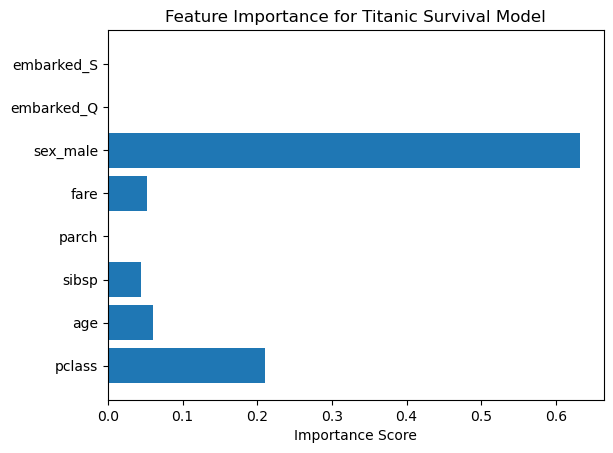

In [ ]:
# 11. FEATURE IMPORTANCE

import numpy as np
import matplotlib.pyplot as plt

# Get feature importance scores from the trained model
importances = model.feature_importances_

print("Feature Importances:")
for name, score in zip(feature_names, importances):
    print(f"{name}: {score:.3f}")

# Visualize feature importance as a horizontal bar chart
plt.barh(feature_names, importances)
plt.xlabel("Importance Score")
plt.title("Feature Importance for Titanic Survival Model")
plt.show()


## Step 12: Visualize the Decision Tree

We can draw the decision tree to see the actual questions it asks, like:

- "Is `sex_male` <= 0.5?"  
- "Is `pclass` <= 1.5?"  
- etc.

This helps students understand how the model is making decisions.


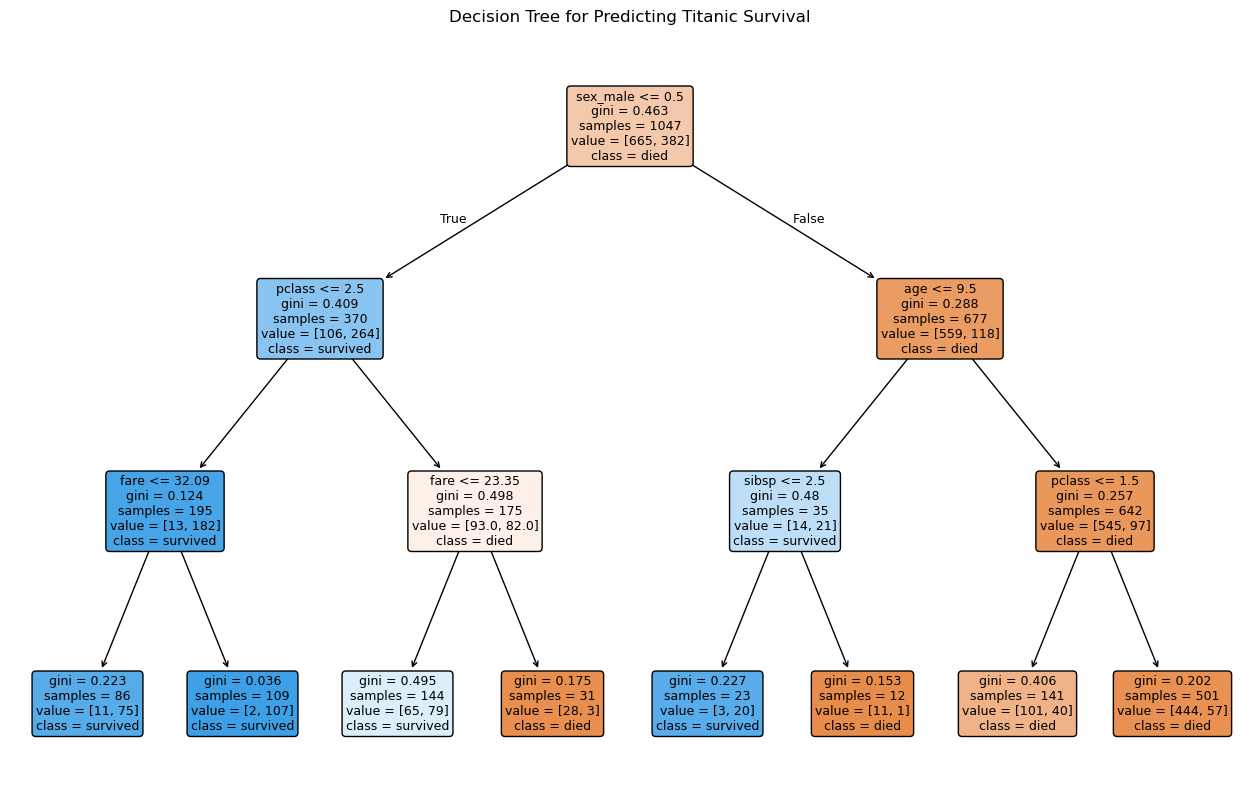

In [ ]:
# 12. VISUALIZE (PLOT) THE DECISION TREE

from sklearn.tree import plot_tree

# Set up the figure size for the tree plot
plt.figure(figsize=(16, 10))

# Draw the tree structure
plot_tree(
    model,
    feature_names=feature_names,   # names of input features
    class_names=["died", "survived"],  # class labels for 0 and 1
    filled=True,                  # color nodes by class
    rounded=True,                 # rounded corners for nicer look
    fontsize=9
)

plt.title("Decision Tree for Predicting Titanic Survival")
plt.show()


## Step 13: Predict a Single New Passenger (What-if Scenario)

Finally, we can make a prediction for a **made-up passenger**.

We have to pass the features in the **same order** as `feature_names`:

`[pclass, age, sibsp, parch, fare, sex_male, embarked_Q, embarked_S]`


In [ ]:
# 13. USE THE MODEL TO PREDICT A NEW, MADE-UP PASSENGER

# Example passenger:
# - 3rd class
# - 25 years old
# - no siblings/spouses aboard
# - no parents/children aboard
# - fare = 7.25
# - sex_male = 1 (male)
# - embarked_Q = 0, embarked_S = 1  (so this means embarked at 'S')

new_passenger = [[3, 25, 0, 0, 7.25, 1, 0, 1]]

# Use the model to predict if this passenger would survive
new_prediction = model.predict(new_passenger)

print("Prediction for new passenger [3rd class, 25, male, embarked at S]:")
print("Survived?" , "Yes (1)" if new_prediction[0] == 1 else "No (0)")


Prediction for new passenger [3rd class, 25, male, embarked at S]:
Survived? No (0)


C:\Users\MC_Rmcmaster\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
